<a href="https://colab.research.google.com/github/christophermalone/DSCI325/blob/main/Module5_Part2R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 5 - Part 2 R - Twitter API in R

Twitter is another organization that provides an API that can be used to gain access to information that is owned by Twitter.

## Set Up - Twitter Side

There is some setup on the Twitter side that must be done before you can use the Twitter API.  You will first need to setup a Twitter Developer account.  The next step is to create an "app".  This app is necessary to make an API connection.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1i8BwnW4NVKIQOzulnw0yqAVEOBDWSeb5" height="50%" width="50%"></p>


Under the Keys and Tokens tab, there are four specifications that are required for the API.

*   API Key
*   API Secret Key
*   Access_token
*   Access_token_secret





<p align='center'><img src="https://drive.google.com/uc?export=view&id=1A3c1o2ty4rwemc-Ax9m5NSiIwbWl0NuX" height="50%" width="50%"></p>


## Set Up - R Side

The <strong>rtweet</strong> package will be used to connect to the Twitter API.  This package will is installed and loaded with the following code.

In [143]:
## install rtweet from CRAN
install.packages("rtweet")

## load rtweet package
library(rtweet)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



The following web page provides substanital information regarding the details of connecting to the Twitter API. 

Rtweet / Twitter API Vignette: https://cran.r-project.org/web/packages/rtweet/vignettes/auth.html

<br>
This Notebook will use the <strong>Access token / secret method</strong> method to make a connection to the Twitter API.  The Access token / secret method requires that you obtain the following:


*   API Key
*   API Secret Key
*   Access_token
*   Access_token_secret



In [145]:
## store api keys (these are my key values; replace these with your own key values)
app_name <- ""
api_key <- ""
api_secret_key <- ""
access_token <- ""
access_token_secret <- ""

These keys are used to create a <strong>token</strong> which is used to establish a connection with the Twitter API.

In [146]:
token <- create_token(
                       app = app_name,
                       consumer_key = api_key,
                       consumer_secret = api_secret_key,
                       access_token = access_token,
                       access_secret = access_token_secret
                      )

The <strong>get_token()</strong> function can be used to verify the correct setup of your Twitter API token.

In [148]:
get_token()

<Token>
<oauth_endpoint>
 request:   https://api.twitter.com/oauth/request_token
 authorize: https://api.twitter.com/oauth/authenticate
 access:    https://api.twitter.com/oauth/access_token
<oauth_app> DSCI 325 Class
  key:    gt9ajjfJPhHFIjQ7y6rSGYlcy
  secret: <hidden>
<credentials> oauth_token, oauth_token_secret
---

## Getting Data from the Twitter API

After a token has been created, you are now able to pull tweets using the Twitter API.  Similar to the Yelp API, there are several methods to conduct a search, e.g. by #hashtag, screen_name, etc.

Consider the following search:

*   Search on #derekchauvin
*   Limit search to 2500 tweets
*   Identify a start time for tweets to be pulled



In [167]:
#Getting a pull for #derekchauvin
search_term <- "#derekchauvin"
number_to_search <- 2500
start_date <- "2021-04-20"
#stop_date <- "2021-04-21"

# Use search_tweets() to pull tweets
pull <- search_tweets(
                       q=search_term, 
                       n = number_to_search, 
                       since = start_date,
                       #until = stop_date,    #this can be used to establish a stop time
                       #retryonratelimit = TRUE,  #this can be used to improve the searching when specifying start/stop times
                       include_rts = FALSE
)

Taking a look at the outcomes returned by the API.  Similar to the Yelp API, the JSON data format is automatically converted to more useable data format in R, e.g. list or tibble.

In [168]:
head(pull, n=2)

user_id             status_id           created_at          screen_name    
1 1385274962332815362 1385304944803205123 2021-04-22 18:50:11 AllLifesMatter6
2 159189405           1385304363862794243 2021-04-22 18:47:52 realwordsspoken
  text                                                                                                                                                                                                                                         
1 #BlackLivesMatter #BLM #DefundThePolice #AllLivesMatter #GeorgeFloyd #GeorgeFloydTrial #DerekChauvin #makhiabryant #ColumbusOhio #GeorgeFloydverdict #MakiahBryant #AbolishThePolice #GeorgeFloydJusticeInPolicingAct https://t.co/Wuw0rjc267
2 In Shocking Turn of Events, @TuckerCarlson of #FoxNews and #Republican Marjorie Taylor Greene of #Georgia Aren’t Happy With #DerekChauvin Verdict https://t.co/tUc4Z0bQMO via @VanityFair                                                    
  source              display_text_width reply_to_status_id reply_to_user_id
1 Twitter for Android 213                NA                 NA              
2 Twitter for iPhone  185                NA                 NA              
  reply_to_screen_name ⋯ statuses_count favourites_count account_created_at 
1 NA                   ⋯    6             0              2021-04-22 16:51:11
2 NA                   ⋯ 6297           477              2010-06-24 18:16:56
  verified profile_url             profile_expanded_url     account_lang
1 FALSE    NA                      NA                       NA          
2 FALSE    https://t.co/iO4Oc4EP9J http://ow.ly/bLxP309N4Nc NA          
  profile_banner_url                                                  
1 https://pbs.twimg.com/profile_banners/1385274962332815362/1619110444
2 https://pbs.twimg.com/profile_banners/159189405/1595539561          
  profile_background_url                           
1 NA                                               
2 http://abs.twimg.com/images/themes/theme18/bg.gif
  profile_image_url                                                          
1 http://pbs.twimg.com/profile_images/1385275264461152257/c-zLJora_normal.jpg
2 http://pbs.twimg.com/profile_images/1292484453193912326/iGI_vInn_normal.jpg

The Twitter API returned about 2500 tweets.  There are a total of 90 fields returned by the Twitter API.

In [169]:
dim(pull)

[1] 2405   90

Check to see if output is a tibble, i.e. tabled data frame.


In [170]:
is.tibble(pull)

[1] TRUE

Also, check to see if output from API is a list, another common data type that allows for non-tabluar data.

In [171]:
is.list(pull)

[1] TRUE

**Comment**:  It should be noted that the Twitter API may ignore some of your specifications. For example, for some reason the <strong>since</strong> parameter was ignored in the above pull.

In [172]:
range(pull$created_at)

[1] "2021-04-21 16:44:15 UTC" "2021-04-22 18:50:11 UTC"

A list of all the fields that are returned by the Twitter API.

In [173]:
names(pull)

[1] "user_id"                 "status_id"              
 [3] "created_at"              "screen_name"            
 [5] "text"                    "source"                 
 [7] "display_text_width"      "reply_to_status_id"     
 [9] "reply_to_user_id"        "reply_to_screen_name"   
[11] "is_quote"                "is_retweet"             
[13] "favorite_count"          "retweet_count"          
[15] "quote_count"             "reply_count"            
[17] "hashtags"                "symbols"                
[19] "urls_url"                "urls_t.co"              
[21] "urls_expanded_url"       "media_url"              
[23] "media_t.co"              "media_expanded_url"     
[25] "media_type"              "ext_media_url"          
[27] "ext_media_t.co"          "ext_media_expanded_url" 
[29] "ext_media_type"          "mentions_user_id"       
[31] "mentions_screen_name"    "lang"                   
[33] "quoted_status_id"        "quoted_text"            
[35] "quoted_created_at"       "quoted_source"          
[37] "quoted_favorite_count"   "quoted_retweet_count"   
[39] "quoted_user_id"          "quoted_screen_name"     
[41] "quoted_name"             "quoted_followers_count" 
[43] "quoted_friends_count"    "quoted_statuses_count"  
[45] "quoted_location"         "quoted_description"     
[47] "quoted_verified"         "retweet_status_id"      
[49] "retweet_text"            "retweet_created_at"     
[51] "retweet_source"          "retweet_favorite_count" 
[53] "retweet_retweet_count"   "retweet_user_id"        
[55] "retweet_screen_name"     "retweet_name"           
[57] "retweet_followers_count" "retweet_friends_count"  
[59] "retweet_statuses_count"  "retweet_location"       
[61] "retweet_description"     "retweet_verified"       
[63] "place_url"               "place_name"             
[65] "place_full_name"         "place_type"             
[67] "country"                 "country_code"           
[69] "geo_coords"              "coords_coords"          
[71] "bbox_coords"             "status_url"             
[73] "name"                    "location"               
[75] "description"             "url"                    
[77] "protected"               "followers_count"        
[79] "friends_count"           "listed_count"           
[81] "statuses_count"          "favourites_count"       
[83] "account_created_at"      "verified"               
[85] "profile_url"             "profile_expanded_url"   
[87] "account_lang"            "profile_banner_url"     
[89] "profile_background_url"  "profile_image_url"

## Basic Summaries of Tweets

Load the <strong>tidyverse</strong> package that will be used to manipulate the data returned from the API.

In [157]:
library(tidyverse)

### Summary of Location

Here, the top 20 locations for the Tweets is obtained and then plotted using ggplot().

Selecting by n



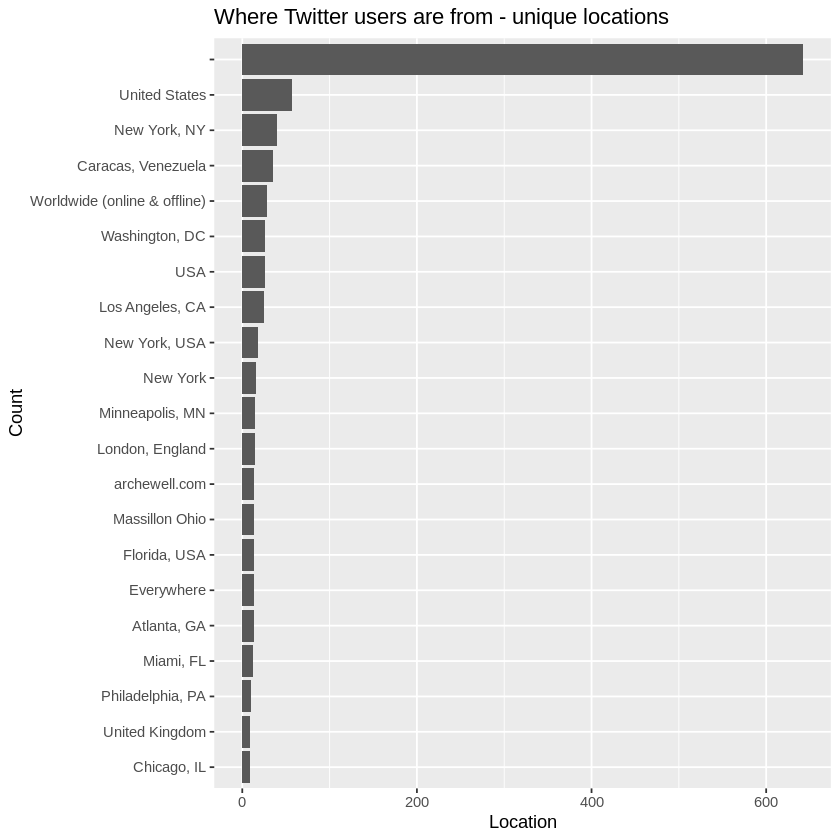

In [174]:
(
  pull 
    %>% count(location, sort = TRUE) 
    %>% mutate(location = reorder(location, n)) 
    %>% top_n(20) 
) -> pull_location
  
  ggplot(data=pull_location, aes(x = location, y = n)) +
                    geom_col() +
                    coord_flip() +
                    labs( 
                          x = "Count",
                          y = "Location",
                          title = "Where Twitter users are from - unique locations "
                      ) 
                      


### Summary of screen_names

Taking a look at the screen_names vector in the pull tibble.

In [175]:
pull$screen_name

[1] "AllLifesMatter6" "realwordsspoken" "thenewshooked"   "thenewshooked"  
   [5] "theweeklyopine"  "camcaffreyy"     "CommChangeAct"   "DevillersEdmund"
   [9] "shadedailynews"  "shadedailynews"  "ComradeBS"       "Project21News"  
  [13] "royalfamilystu"  "JrmieJ"          "JrmieJ"          "JrmieJ"         
  [17] "JrmieJ"          "NeoracistDem"    "NeoracistDem"    "BylineTimesPod" 
  [21] "naijapremiumgst" "drvstjr"         "Deepfatfriedpod" "BOSSBIDNESS"    
  [25] "BOSSBIDNESS"     "impakterdotcom"  "impakterdotcom"  "Jogi_hoya_jatt" 
  [29] "gistaroundyou"   "SeizeLouis1"     "yissellec2"      "ChenWei82595707"
  [33] "DispatchFL"      "busy_lines"      "HuffGluOfficial" "NewsroomPR"     
  [37] "NewsroomPR"      "NewsroomPR"      "NewsroomPR"      "SpectreOvChaos" 
  [41] "SpectreOvChaos"  "SpectreOvChaos"  "SpectreOvChaos"  "SpectreOvChaos" 
  [45] "SpectreOvChaos"  "SpectreOvChaos"  "AlonBenMeir"     "ElizabethSidda1"
  [49] "ElizabethSidda1" "ElizabethSidda1" "ElizabethSidda1" "ElizabethSidda1"
  [53] "ElizabethSidda1" "ElizabethSidda1" "ElizabethSidda1" "ElizabethSidda1"
  [57] "ElizabethSidda1" "ElizabethSidda1" "ElizabethSidda1" "ElizabethSidda1"
  [61] "ElizabethSidda1" "hthrun"          "TheHTodd"        "freespeak3"     
  [65] "terrier1968bull" "SonOfAlgos"      "UhuruSolidarity" "UhuruSolidarity"
  [69] "JamesSi89212443" "TyeSmith100"     "darinaligadhvi"  "thelovelygwen"  
  [73] "bullriders1"     "JohnathanPerk"   "JohnathanPerk"   "JohnathanPerk"  
  [77] "JulieMarieNewt1" "DGraemer"        "rodriguezmonos"  "PMPmagToday"    
  [81] "Diario_EP"       "RealROARPodcast" "PabloPardo1"     "PabloPardo1"    
  [85] "ENumberTwo"      "Picevol"         "Picevol"         "zinder41558805" 
  [89] "zinder41558805"  "zinder41558805"  "zinder41558805"  "zinder41558805" 
  [93] "zinder41558805"  "zinder41558805"  "zinder41558805"  "zinder41558805" 
  [97] "zinder41558805"  "zinder41558805"  "HavingKids"      "KneelOnGeorge"  
 [101] "MustafaTameez"   "CalebCoyGuard"   "wmnsmarchla"     "EpochTimesEs"   
 [105] "EpochTimesEs"    "EpochTimesEs"    "EpochTimesEs"    "EpochTimesEs"   
 [109] "EpochTimesEs"    "anonymous_penta" "OurWeeklyNews"   "PostNewsEra_"   
 [113] "PostNewsEra_"    "Procyon25"       "Procyon25"       "Procyon25"      
 [117] "Procyon25"       "Procyon25"       "Procyon25"       "Procyon25"      
 [121] "Procyon25"       "Procyon25"       "Procyon25"       "Procyon25"      
 [125] "Procyon25"       "Procyon25"       "Procyon25"       "Procyon25"      
 [129] "Procyon25"       "Procyon25"       "Procyon25"       "KASHPatel__"    
 [133] "JuanCarlCompres" "SalCelli"        "shalomworldnews" "ChocolatJeesus" 
 [137] "VotingBlueInTX"  "VotingBlueInTX"  "VotingBlueInTX"  "Jezus14267287"  
 [141] "Tkarera"         "AndrewJDuffer"   "mikearroyo"      "BoneKnightmare" 
 [145] "DolarToday"      "DolarToday"      "DolarToday"      "DolarToday"     
 [149] "DolarToday"      "DolarToday"      "DolarToday"      "DolarToday"     
 [153] "DolarToday"      "DolarToday"      "DolarToday"      "DolarToday"     
 [157] "DolarToday"      "DolarToday"      "DolarToday"      "DolarToday"     
 [161] "DolarToday"      "DolarToday"      "DolarToday"      "DolarToday"     
 [165] "DolarToday"      "DolarToday"      "DolarToday"      "DolarToday"     
 [169] "DolarToday"      "DolarToday"      "DolarToday"      "DolarToday"     
 [173] "DolarToday"      "DolarToday"      "DolarToday"      "DolarToday"     
 [177] "DolarToday"      "DolarToday"      "ahsanahmedf"     "DanDigglar"     
 [181] "realJeff60Days"  "realJeff60Days"  "GregA84345904"   "RJ1340"         
 [185] "bvent"           "MimiTexasAngel"  "Erica90835855"   "paz4u"          
 [189] "marsam22reed"    "Ihateitwhenmen1" "FOX5Atlanta"     "FOX5Atlanta"    
 [193] "FOX5Atlanta"     "FOX5Atlanta"     "ShazamShazamSh4" "jewishsf"       
 [197] "PaulOdebiyi"     "mauriciod44"     "KimOrKimberly"   "KimOrKimberly"  
 [201] "lunatic092"      "Underground_USA" "Lisamcgon

Creating a simple barplot of the top 20 screen_names.

Selecting by n



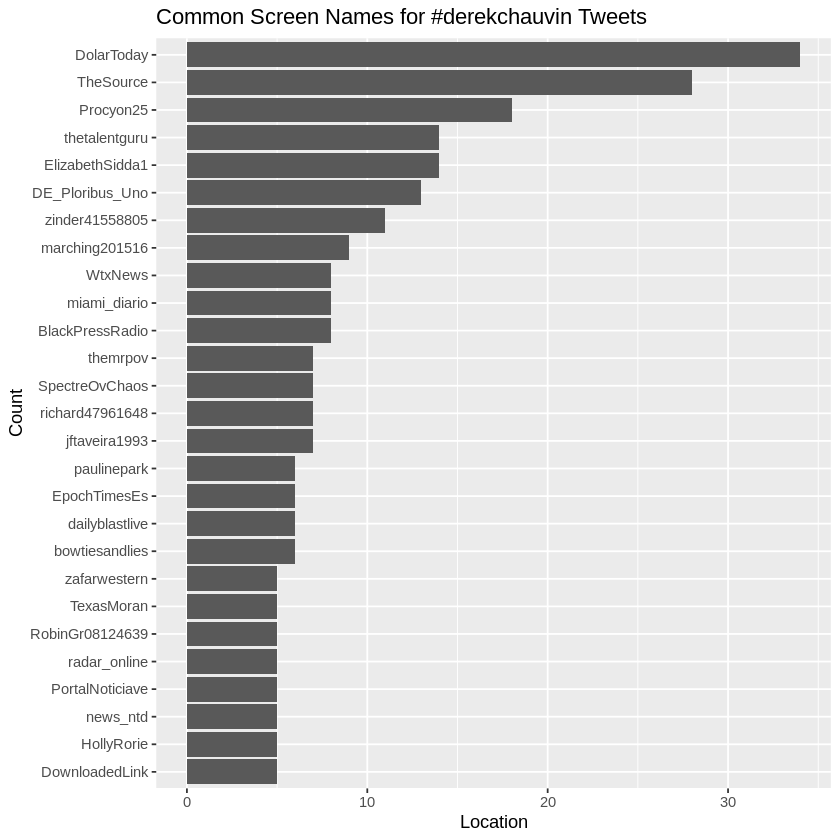

In [176]:
pull %>%
  count(screen_name, sort = TRUE) %>%
  mutate(screen_name = reorder(screen_name, n)) %>%
  top_n(20) %>%
  ggplot(aes(x = screen_name, y = n)) +
  geom_col() +
  coord_flip() +
      labs(x = "Count",
      y = "Location",
      title = "Common Screen Names for #derekchauvin Tweets")

A simple plot for day is mostly meaningless as data obtained is from only two days...

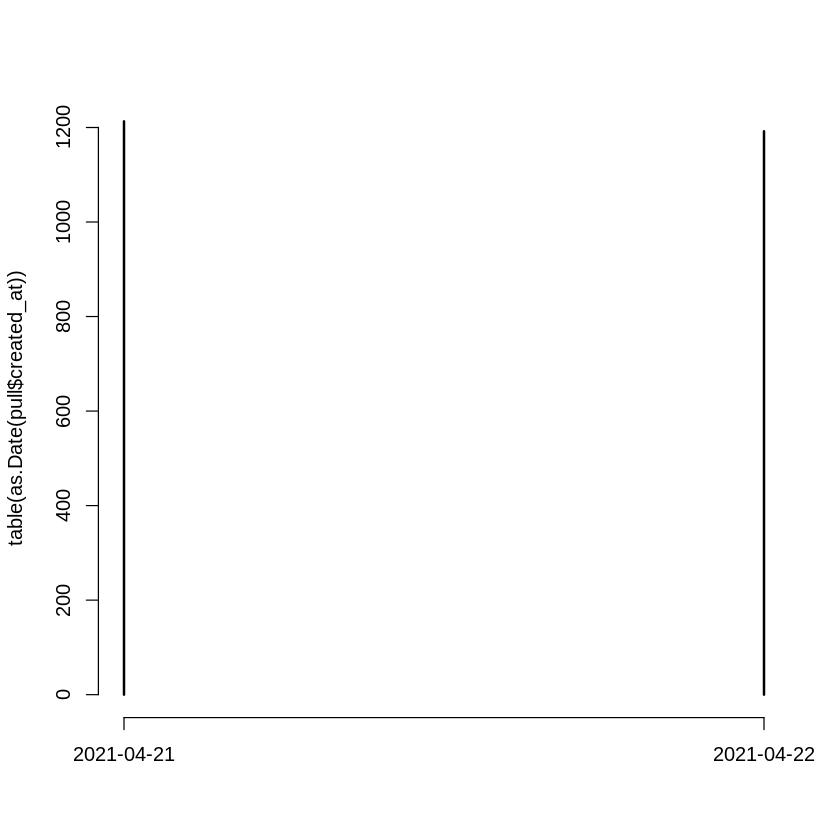

In [178]:
plot(table(as.Date(pull$created_at)))

Next, a plot over hour...

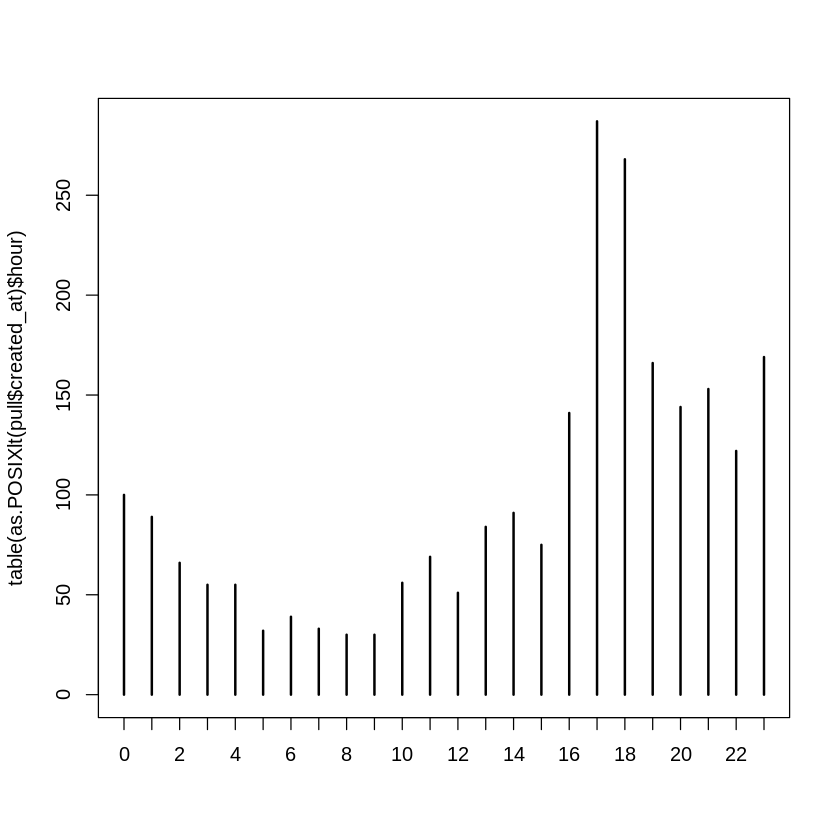

In [180]:
plot(table(as.POSIXlt(pull$created_at)$hour))

## Creating a Wordcloud

Before a word cloud can be made, the several steps are needed to prepare the contents of the tweets.

In [181]:
#Install the TextMining, i.e. tm, package
install.packages("tm")
library(tm)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Put the contents of the tweets into a dataframe.  Also, a corpus is created to more easily manange the text.

In [70]:
#Create a vector containing only the text
tweets <- data.frame(text = pull$text)
# Create a corpus  
docs <- Corpus(VectorSource(tweets$text))

What is the data.type of docs?

In [182]:
str(docs)

List of 2409
 $ 1   :List of 2
  ..$ content: chr "lesterholtnbc nbcnews binance foxnews appleevent apple israel adoptmetrades makhiabryant georgefloyd georgefloy"| __truncated__
  ..$ meta   :List of 7
  .. ..$ author       : chr(0) 
  .. ..$ datetimestamp: POSIXlt[1:1], format: "2021-04-22 18:58:04"
  .. ..$ description  : chr(0) 
  .. ..$ heading      : chr(0) 
  .. ..$ id           : chr "1"
  .. ..$ language     : chr "en"
  .. ..$ origin       : chr(0) 
  .. ..- attr(*, "class")= chr "TextDocumentMeta"
  ..- attr(*, "class")= chr [1:2] "PlainTextDocument" "TextDocument"
 $ 2   :List of 2
  ..$ content: chr "derekchauvin conviction  still   minds  many people including jefferson countys district attorney danny carr sa"| __truncated__
  ..$ meta   :List of 7
  .. ..$ author       : chr(0) 
  .. ..$ datetimestamp: POSIXlt[1:1], format: "2021-04-22 18:58:04"
  .. ..$ description  : chr(0) 
  .. ..$ heading      : chr(0) 
  .. ..$ id           : chr "2"
  .. ..$ language     : chr "en

Going through the tweets and cleaning via brute force.

In [183]:
gsub("https\\S*", "", tweets$text) 
gsub("@\\S*", "", tweets$text) 
gsub("amp", "", tweets$text) 
gsub("[\r\n]", "", tweets$text)
gsub("[^\x01-\x7F]", "", tweets$text)
gsub("[[:punct:]]", "", tweets$text)

[1] "lesterholtnbc nbcnews binance foxnews appleevent apple israel adoptmetrades makhiabryant georgefloyd georgefloydtrial travel biden trump falconandwintersoldier cryptocurrency bitruesummergiveaway derekchauvin defundthepolice chaeryeong furry wynonnaearp "                                                                                                                     
   [2] "derekchauvin conviction is still on the minds of many people including jefferson county's district attorney danny carr says he isn't surprised he was found guilty  tadatpn"                                                                                                                                                                                                        
   [3] "if it take k to fix a root canal baby yall can take it out fuck yall earthday earthday derekchauvin dentistry rootcanal sc"                                                                                                                                                                                                                                                         
   [4] "of course white supremacy concerns itself more with the suffering and 'unfair' treatment of a murderer like derekchauvin than with the black life he deprived by putting a knee on his neck for almost ten minutes"                                                                                                                                                                 
   [5] "while derekchauvin will go to jail america remains on trial for systemicracism amp policy violence used as weapons of mass destruction against black people every day tawannaablack joined wccoradio's roshinir to talk about the verdict amp what's next  kfmwv"                                                                                                                   
   [6] "neverforget it takes an minute kneel to convict murder against a black man we are not equal to any race here in america learn more at  aqzp a georgefloyd derekchauvin justice minesota usa derekchauvintrial  d ujkj"                                                                                                                                                              
   [7] "georgefloyd derekchauvin derekchauvintrial  s"                                                                                                                                                                                                                                                                                                                                      
   [8] "it shows that police officers are not above the law says jack rice a lawyer in the twin cities minneapolis and st paul  makhiabryant blm derekchauvin policebrutality georgefloyd sayhisname  tc q z"                                                                                                                                                                               
   [9] "the reaction made us look at the way society is structured and how it entrenches the power of some and marginalises others makhiabryant blm derekchauvin policebrutality georgefloyd sayhisname  p gujkmkh"                                                                                                                                                                         
  [10] "convicted killer derek chauvin in hour isolation derekchauvin derekchauvinguilty minnesota georgefloyd george unitedstates blacklivesmatter "                                                                                                                                                                                                                                       
  [11] "oprahwinfrey 'in tears' as dozens of stars welcome derek chauvin guilty verdict georgefloyd derekchauvin georgefloydtrial derekchauvintrial blm "                                        

[1] "lesterholtnbc nbcnews binance foxnews appleevent apple israel adoptmetrades makhiabryant georgefloyd georgefloydtrial travel biden trump falconandwintersoldier cryptocurrency bitruesummergiveaway derekchauvin defundthepolice chaeryeong furry wynonnaearp httpstcoqosyzolanc"                                                                                                   
   [2] "derekchauvin conviction is still on the minds of many people including jefferson county's district attorney danny carr says he isn't surprised he was found guilty httpstcocm tadatpn"                                                                                                                                                                                              
   [3] "if it take k to fix a root canal baby yall can take it out fuck yall earthday earthday derekchauvin dentistry rootcanal sc"                                                                                                                                                                                                                                                         
   [4] "of course white supremacy concerns itself more with the suffering and 'unfair' treatment of a murderer like derekchauvin than with the black life he deprived by putting a knee on his neck for almost ten minutes"                                                                                                                                                                 
   [5] "while derekchauvin will go to jail america remains on trial for systemicracism amp policy violence used as weapons of mass destruction against black people every day tawannaablack joined wccoradio's roshinir to talk about the verdict amp what's next httpstcojtlu kfmwv"                                                                                                       
   [6] "neverforget it takes an minute kneel to convict murder against a black man we are not equal to any race here in america learn more at httpstcotj aqzp a georgefloyd derekchauvin justice minesota usa derekchauvintrial httpstcogc d ujkj"                                                                                                                                          
   [7] "georgefloyd derekchauvin derekchauvintrial httpstcoppypnfzx s"                                                                                                                                                                                                                                                                                                                      
   [8] "it shows that police officers are not above the law says jack rice a lawyer in the twin cities minneapolis and st paul httpstcodiicnrnalm makhiabryant blm derekchauvin policebrutality georgefloyd sayhisname httpstcowrw tc q z"                                                                                                                                                  
   [9] "the reaction made us look at the way society is structured and how it entrenches the power of some and marginalises others makhiabryant blm derekchauvin policebrutality georgefloyd sayhisname httpstco p gujkmkh"                                                                                                                                                                 
  [10] "convicted killer derek chauvin in hour isolation derekchauvin derekchauvinguilty minnesota georgefloyd george unitedstates blacklivesmatter httpstcodthqoscgeq"                                                                                                                                                                                                                     
  [11] "oprahwinfrey 'in tears' as dozens of stars welcome derek chauvin guilty verdict georgefloyd derekchauvin georgefloydtrial derekchauvintrial blm httpstcomlgsjhnmmz"                      

[1] "lesterholtnbc nbcnews binance foxnews appleevent apple israel adoptmetrades makhiabryant georgefloyd georgefloydtrial travel biden trump falconandwintersoldier cryptocurrency bitruesummergiveaway derekchauvin defundthepolice chaeryeong furry wynonnaearp httpstcoqosyzolanc"                                                                                                   
   [2] "derekchauvin conviction is still on the minds of many people including jefferson county's district attorney danny carr says he isn't surprised he was found guilty httpstcocm tadatpn"                                                                                                                                                                                              
   [3] "if it take k to fix a root canal baby yall can take it out fuck yall earthday earthday derekchauvin dentistry rootcanal sc"                                                                                                                                                                                                                                                         
   [4] "of course white supremacy concerns itself more with the suffering and 'unfair' treatment of a murderer like derekchauvin than with the black life he deprived by putting a knee on his neck for almost ten minutes"                                                                                                                                                                 
   [5] "while derekchauvin will go to jail america remains on trial for systemicracism  policy violence used as weapons of mass destruction against black people every day tawannaablack joined wccoradio's roshinir to talk about the verdict  what's next httpstcojtlu kfmwv"                                                                                                             
   [6] "neverforget it takes an minute kneel to convict murder against a black man we are not equal to any race here in america learn more at httpstcotj aqzp a georgefloyd derekchauvin justice minesota usa derekchauvintrial httpstcogc d ujkj"                                                                                                                                          
   [7] "georgefloyd derekchauvin derekchauvintrial httpstcoppypnfzx s"                                                                                                                                                                                                                                                                                                                      
   [8] "it shows that police officers are not above the law says jack rice a lawyer in the twin cities minneapolis and st paul httpstcodiicnrnalm makhiabryant blm derekchauvin policebrutality georgefloyd sayhisname httpstcowrw tc q z"                                                                                                                                                  
   [9] "the reaction made us look at the way society is structured and how it entrenches the power of some and marginalises others makhiabryant blm derekchauvin policebrutality georgefloyd sayhisname httpstco p gujkmkh"                                                                                                                                                                 
  [10] "convicted killer derek chauvin in hour isolation derekchauvin derekchauvinguilty minnesota georgefloyd george unitedstates blacklivesmatter httpstcodthqoscgeq"                                                                                                                                                                                                                     
  [11] "oprahwinfrey 'in tears' as dozens of stars welcome derek chauvin guilty verdict georgefloyd derekchauvin georgefloydtrial derekchauvintrial blm httpstcomlgsjhnmmz"                      

[1] "lesterholtnbc nbcnews binance foxnews appleevent apple israel adoptmetrades makhiabryant georgefloyd georgefloydtrial travel biden trump falconandwintersoldier cryptocurrency bitruesummergiveaway derekchauvin defundthepolice chaeryeong furry wynonnaearp httpstcoqosyzolanc"                                                                                                   
   [2] "derekchauvin conviction is still on the minds of many people including jefferson county's district attorney danny carr says he isn't surprised he was found guilty httpstcocm tadatpn"                                                                                                                                                                                              
   [3] "if it take k to fix a root canal baby yall can take it out fuck yall earthday earthday derekchauvin dentistry rootcanal sc"                                                                                                                                                                                                                                                         
   [4] "of course white supremacy concerns itself more with the suffering and 'unfair' treatment of a murderer like derekchauvin than with the black life he deprived by putting a knee on his neck for almost ten minutes"                                                                                                                                                                 
   [5] "while derekchauvin will go to jail america remains on trial for systemicracism amp policy violence used as weapons of mass destruction against black people every day tawannaablack joined wccoradio's roshinir to talk about the verdict amp what's next httpstcojtlu kfmwv"                                                                                                       
   [6] "neverforget it takes an minute kneel to convict murder against a black man we are not equal to any race here in america learn more at httpstcotj aqzp a georgefloyd derekchauvin justice minesota usa derekchauvintrial httpstcogc d ujkj"                                                                                                                                          
   [7] "georgefloyd derekchauvin derekchauvintrial httpstcoppypnfzx s"                                                                                                                                                                                                                                                                                                                      
   [8] "it shows that police officers are not above the law says jack rice a lawyer in the twin cities minneapolis and st paul httpstcodiicnrnalm makhiabryant blm derekchauvin policebrutality georgefloyd sayhisname httpstcowrw tc q z"                                                                                                                                                  
   [9] "the reaction made us look at the way society is structured and how it entrenches the power of some and marginalises others makhiabryant blm derekchauvin policebrutality georgefloyd sayhisname httpstco p gujkmkh"                                                                                                                                                                 
  [10] "convicted killer derek chauvin in hour isolation derekchauvin derekchauvinguilty minnesota georgefloyd george unitedstates blacklivesmatter httpstcodthqoscgeq"                                                                                                                                                                                                                     
  [11] "oprahwinfrey 'in tears' as dozens of stars welcome derek chauvin guilty verdict georgefloyd derekchauvin georgefloydtrial derekchauvintrial blm httpstcomlgsjhnmmz"                      

[1] "lesterholtnbc nbcnews binance foxnews appleevent apple israel adoptmetrades makhiabryant georgefloyd georgefloydtrial travel biden trump falconandwintersoldier cryptocurrency bitruesummergiveaway derekchauvin defundthepolice chaeryeong furry wynonnaearp httpstcoqosyzolanc"                                                                                                   
   [2] "derekchauvin conviction is still on the minds of many people including jefferson county's district attorney danny carr says he isn't surprised he was found guilty httpstcocm tadatpn"                                                                                                                                                                                              
   [3] "if it take k to fix a root canal baby yall can take it out fuck yall earthday earthday derekchauvin dentistry rootcanal sc"                                                                                                                                                                                                                                                         
   [4] "of course white supremacy concerns itself more with the suffering and 'unfair' treatment of a murderer like derekchauvin than with the black life he deprived by putting a knee on his neck for almost ten minutes"                                                                                                                                                                 
   [5] "while derekchauvin will go to jail america remains on trial for systemicracism amp policy violence used as weapons of mass destruction against black people every day tawannaablack joined wccoradio's roshinir to talk about the verdict amp what's next httpstcojtlu kfmwv"                                                                                                       
   [6] "neverforget it takes an minute kneel to convict murder against a black man we are not equal to any race here in america learn more at httpstcotj aqzp a georgefloyd derekchauvin justice minesota usa derekchauvintrial httpstcogc d ujkj"                                                                                                                                          
   [7] "georgefloyd derekchauvin derekchauvintrial httpstcoppypnfzx s"                                                                                                                                                                                                                                                                                                                      
   [8] "it shows that police officers are not above the law says jack rice a lawyer in the twin cities minneapolis and st paul httpstcodiicnrnalm makhiabryant blm derekchauvin policebrutality georgefloyd sayhisname httpstcowrw tc q z"                                                                                                                                                  
   [9] "the reaction made us look at the way society is structured and how it entrenches the power of some and marginalises others makhiabryant blm derekchauvin policebrutality georgefloyd sayhisname httpstco p gujkmkh"                                                                                                                                                                 
  [10] "convicted killer derek chauvin in hour isolation derekchauvin derekchauvinguilty minnesota georgefloyd george unitedstates blacklivesmatter httpstcodthqoscgeq"                                                                                                                                                                                                                     
  [11] "oprahwinfrey 'in tears' as dozens of stars welcome derek chauvin guilty verdict georgefloyd derekchauvin georgefloydtrial derekchauvintrial blm httpstcomlgsjhnmmz"                      

[1] "lesterholtnbc nbcnews binance foxnews appleevent apple israel adoptmetrades makhiabryant georgefloyd georgefloydtrial travel biden trump falconandwintersoldier cryptocurrency bitruesummergiveaway derekchauvin defundthepolice chaeryeong furry wynonnaearp httpstcoqosyzolanc"                                                                                                 
   [2] "derekchauvin conviction is still on the minds of many people including jefferson countys district attorney danny carr says he isnt surprised he was found guilty httpstcocm tadatpn"                                                                                                                                                                                              
   [3] "if it take k to fix a root canal baby yall can take it out fuck yall earthday earthday derekchauvin dentistry rootcanal sc"                                                                                                                                                                                                                                                       
   [4] "of course white supremacy concerns itself more with the suffering and unfair treatment of a murderer like derekchauvin than with the black life he deprived by putting a knee on his neck for almost ten minutes"                                                                                                                                                                 
   [5] "while derekchauvin will go to jail america remains on trial for systemicracism amp policy violence used as weapons of mass destruction against black people every day tawannaablack joined wccoradios roshinir to talk about the verdict amp whats next httpstcojtlu kfmwv"                                                                                                       
   [6] "neverforget it takes an minute kneel to convict murder against a black man we are not equal to any race here in america learn more at httpstcotj aqzp a georgefloyd derekchauvin justice minesota usa derekchauvintrial httpstcogc d ujkj"                                                                                                                                        
   [7] "georgefloyd derekchauvin derekchauvintrial httpstcoppypnfzx s"                                                                                                                                                                                                                                                                                                                    
   [8] "it shows that police officers are not above the law says jack rice a lawyer in the twin cities minneapolis and st paul httpstcodiicnrnalm makhiabryant blm derekchauvin policebrutality georgefloyd sayhisname httpstcowrw tc q z"                                                                                                                                                
   [9] "the reaction made us look at the way society is structured and how it entrenches the power of some and marginalises others makhiabryant blm derekchauvin policebrutality georgefloyd sayhisname httpstco p gujkmkh"                                                                                                                                                               
  [10] "convicted killer derek chauvin in hour isolation derekchauvin derekchauvinguilty minnesota georgefloyd george unitedstates blacklivesmatter httpstcodthqoscgeq"                                                                                                                                                                                                                   
  [11] "oprahwinfrey in tears as dozens of stars welcome derek chauvin guilty verdict georgefloyd derekchauvin georgefloydtrial derekchauvintrial blm httpstcomlgsjhnmmz"                                            

An alternative is to use the <strong>strip()</strong> from the <strong>textclean</strong> package.

In [184]:
install.packages("textclean")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Load the package...

In [185]:
library(textclean)

Pass the text through strip() function...

In [186]:
tweets$text <- strip(tweets$text)

Next, pass the clean version of the tweets into Corpus() function.

In [187]:
# Create a corpus  
docs <- Corpus(VectorSource(tweets$text))

In [188]:
docs <- docs %>%
  tm_map(removeNumbers) %>%
  tm_map(removePunctuation) %>%
  tm_map(stripWhitespace)
docs <- tm_map(docs, content_transformer(tolower))
docs <- tm_map(docs, removeWords, stopwords("english"))

Warning message in tm_map.SimpleCorpus(., removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, removeWords, stopwords("english")):
“transformation drops documents”


Create a dataframe with the word lists...

In [189]:
dtm <- TermDocumentMatrix(docs) 
matrix <- as.matrix(dtm) 
words <- sort(rowSums(matrix),decreasing=TRUE) 
word_list <- data.frame(word = names(words),freq=words)

### Create the Wordcloud 

In [190]:
install.packages("wordcloud")
library(wordcloud)
install.packages("RColorBrewer")
library(RColorBrewer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Code to make the word cloud...

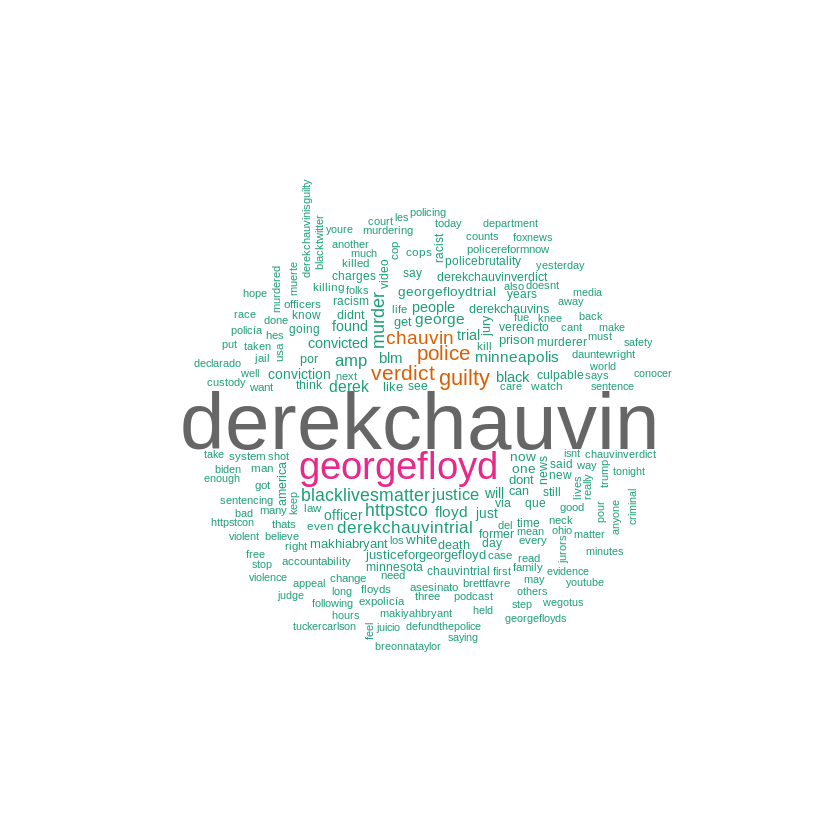

In [191]:
set.seed(1234) # for reproducibility 

wordcloud(words = word_list$word, freq = word_list$freq, min.freq = 20,
           max.words=200, random.order=FALSE,
           colors=brewer.pal(8, "Dark2"))

## Sentiment Analysis

In [193]:
install.packages("syuzhet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Load the syuzhet package...

In [101]:
library(syuzhet)


Attaching package: ‘syuzhet’


The following object is masked from ‘package:rtweet’:

    get_tokens




Get sentiment scores...

In [194]:
emotion_scores <-get_nrc_sentiment(tweets$text)

In [196]:
head(emotion_scores)

anger anticipation disgust fear joy sadness surprise trust negative positive
1 0     0            0       0    0   0       1        0     0        0       
2 2     0            0       1    1   1       1        2     2        3       
3 0     0            0       1    1   0       0        0     0        1       
4 2     2            2       3    2   3       1        2     4        2       
5 2     0            1       4    0   3       0        2     5        3       
6 2     0            2       2    0   3       1        1     3        2

In [197]:
dim(emotion_scores)

[1] 2409   10

In [198]:
(
  emotion_scores
  %>% gather("emotion",score)
  %>% group_by(emotion)
  %>% summarize(TotalScore = sum(score))
  %>% arrange(desc(TotalScore))
) -> emotion_scores_total

In [199]:
emotion_scores_total

emotion      TotalScore
1  negative     3214      
2  positive     2840      
3  fear         2726      
4  trust        2379      
5  anger        2017      
6  sadness      1999      
7  anticipation 1255      
8  disgust      1061      
9  joy           834      
10 surprise      805

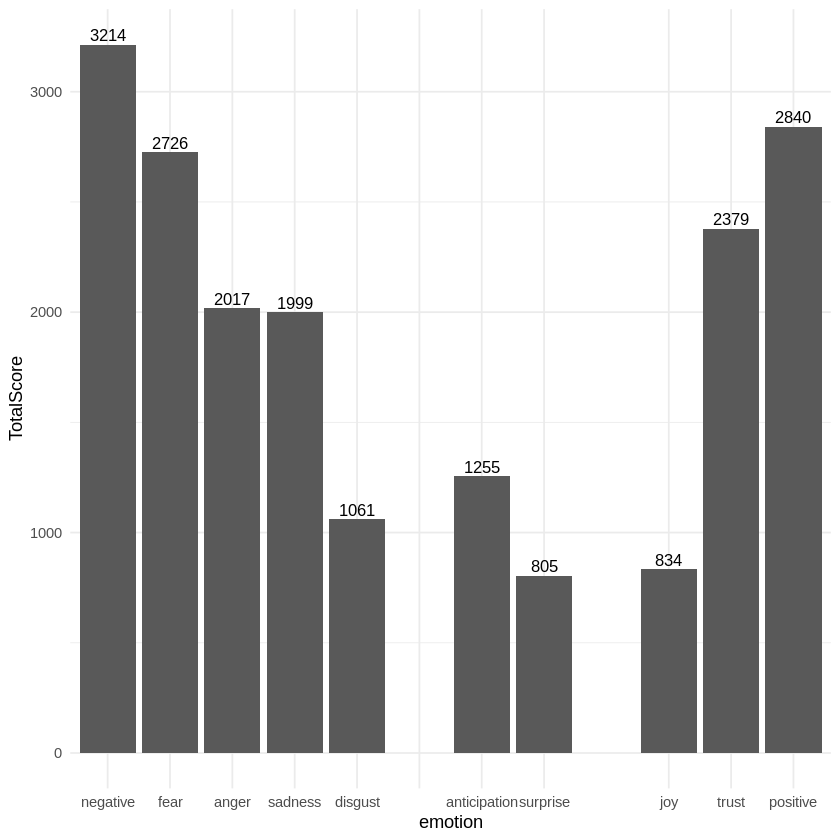

In [200]:
ggplot(data=emotion_scores_total, aes(x=emotion, y=TotalScore)) +
  geom_bar(stat="identity")+
  scale_x_discrete(limits = c("negative", "fear","anger","sadness","disgust"," ","anticipation","surprise"," ","joy","trust","positive")) +
  geom_text(aes(label=TotalScore), vjust=-0.3, size=3.5)+
  theme_minimal()

In [201]:
(
  emotion_scores_total
  %>% mutate(sentiment = case_when(
                                    emotion == 'negative' ~ 'negative_side',
                                    emotion == 'fear' ~ 'negative_side',
                                    emotion == 'anger' ~ 'negative_side',
                                    emotion == 'sadness' ~ 'negative_side',
                                    emotion == 'disgust' ~ 'negative_side',
                                    emotion == 'anticipation' ~ 'surprised',
                                    emotion == 'surprise' ~ 'surprised',
                                    emotion == 'joy' ~ 'positive_side',
                                    emotion == 'trust' ~ 'positive_side',
                                    emotion == 'positive' ~ 'positive_side'
                                  )
             )

) -> emotion_scores_total

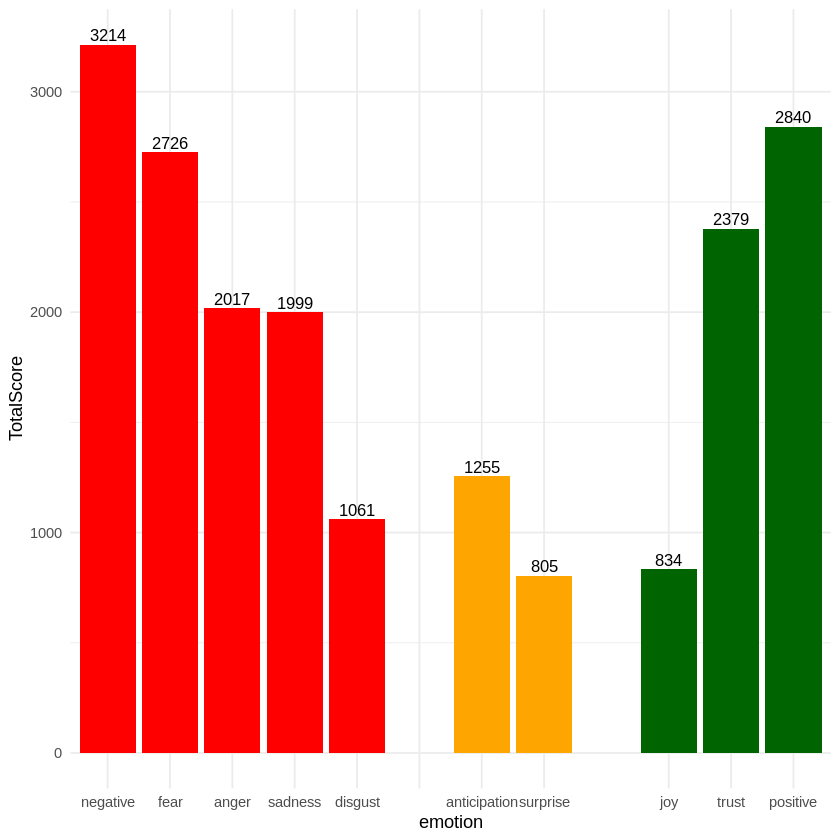

In [202]:
ggplot(data=emotion_scores_total, aes(x=emotion, y=TotalScore, fill=sentiment)) +
  geom_bar(stat="identity")+
  scale_x_discrete(limits = c("negative", "fear","anger","sadness","disgust"," ","anticipation","surprise"," ","joy","trust","positive")) +
  scale_fill_manual("legend", values = c("negative_side" = "red", "surprised" = "orange", "positive_side" = "darkgreen")) +
  geom_text(aes(label=TotalScore), vjust=-0.3, size=3.5)+
  theme_minimal() +
  theme(legend.position = "none") 